<a href="https://colab.research.google.com/github/LingPeiYu/AaltoThesisDataAnalysis/blob/main/AaltoThesisDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression Analysis

In [156]:
#Polynomial Regression Analysis
%config Completer.use_jedi = False # enable code auto-completion
import numpy as np #import numpy to work with arrays
import pandas as pd #import pandas to manipulate the dataset
from matplotlib import pyplot as plt #import the module matplotlib.pyplot to do visulization
from sklearn.preprocessing import PolynomialFeatures,normalize,MinMaxScaler # function to generate polynomial and interaction features
from sklearn.linear_model import LinearRegression,LogisticRegression,HuberRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score # function to calculate mean squared error
from sklearn.model_selection import train_test_split

In [157]:
data1=pd.read_csv("2023-3-31-18-54-29.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False)
data2=pd.read_csv("2023-4-1-13-06-22.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False)

TestData=pd.concat([data1,data2],axis=0)

# print the first 5 rows of the DataFrame 'RawData'
print(type(TestData))
#print how many rows in the 'RawData'
print(len(TestData))

print(TestData)

<class 'pandas.core.frame.DataFrame'>
40
    TestIndex  LevelIndex  Width  Length  ChessGroup  DataPieceCount  \
0           0           2     10      10       10023              10   
1           1          14     10      10        1102              10   
2           2           9     10      10          12              10   
3           3          16     10      10        2004              10   
4           4          18     10      10        2004              10   
5           5           6     10      10         404              10   
6           6          17     10      10        2004              10   
7           7           7     10      10         404              10   
8           8          12     10      10        1102              10   
9           9           5     10      10         404              10   
10         10           4     10      10         404              10   
11         11          15     10      10        1102              10   
12         12          

<ipython-input-157-665dd17186c4>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data1=pd.read_csv("2023-3-31-18-54-29.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False)
<ipython-input-157-665dd17186c4>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data2=pd.read_csv("2023-4-1-13-06-22.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False)


In [158]:
TestData.columns

Index(['TestIndex', 'LevelIndex', 'Width', 'Length', 'ChessGroup',
       'DataPieceCount', 'TargetStep', 'StepRange(+-)', 'AIBestStep',
       'GenerationTime', 'FailureCount', 'SuccessStep', 'PercivedDifficulty'],
      dtype='object')

In [159]:
TestData=TestData.assign(KingCount=TestData['ChessGroup']//100000)
TestData=TestData.assign(QueenCount=TestData['ChessGroup']%100000//10000)
TestData=TestData.assign(RookCount=TestData['ChessGroup']%10000//1000)
TestData=TestData.assign(BishopCount=TestData['ChessGroup']%1000//100)
TestData=TestData.assign(KnightCount=TestData['ChessGroup']%100//10)
TestData=TestData.assign(PawnCount=TestData['ChessGroup']%10//1)

print(type(TestData))

<class 'pandas.core.frame.DataFrame'>


In [160]:
TestData.columns

Index(['TestIndex', 'LevelIndex', 'Width', 'Length', 'ChessGroup',
       'DataPieceCount', 'TargetStep', 'StepRange(+-)', 'AIBestStep',
       'GenerationTime', 'FailureCount', 'SuccessStep', 'PercivedDifficulty',
       'KingCount', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount',
       'PawnCount'],
      dtype='object')

In [161]:
TestData=TestData[['TestIndex', 'LevelIndex', 'Width', 'Length', 
       'KingCount', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount',
       'DataPieceCount', 'TargetStep', 'StepRange(+-)', 'AIBestStep',
       'FailureCount', 'SuccessStep', 'PercivedDifficulty']]
print(TestData)

    TestIndex  LevelIndex  Width  Length  KingCount  QueenCount  RookCount  \
0           0           2     10      10          0           1          0   
1           1          14     10      10          0           0          1   
2           2           9     10      10          0           0          0   
3           3          16     10      10          0           0          2   
4           4          18     10      10          0           0          2   
5           5           6     10      10          0           0          0   
6           6          17     10      10          0           0          2   
7           7           7     10      10          0           0          0   
8           8          12     10      10          0           0          1   
9           9           5     10      10          0           0          0   
10         10           4     10      10          0           0          0   
11         11          15     10      10          0           0 

In [162]:
scaler = MinMaxScaler()

X=TestData[['AIBestStep','KingCount', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount']]
X['AIBestStep']=scaler.fit_transform(X[['AIBestStep']])
X=X.to_numpy()
y=TestData[['PercivedDifficulty']]
y['PercivedDifficulty']=scaler.fit_transform(y[['PercivedDifficulty']])
y=y.to_numpy()

print(X)
print(y)

X_train, X_rem, y_train, y_rem = train_test_split(X,y,test_size=0.5,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem,test_size=0.2,random_state=42)

[[0.77777778 0.         1.         0.         0.         2.
  3.        ]
 [0.66666667 0.         0.         1.         1.         0.
  2.        ]
 [0.51851852 0.         0.         0.         0.         1.
  2.        ]
 [0.11111111 0.         0.         2.         0.         0.
  4.        ]
 [0.62962963 0.         0.         2.         0.         0.
  4.        ]
 [0.62962963 0.         0.         0.         4.         0.
  4.        ]
 [0.44444444 0.         0.         2.         0.         0.
  4.        ]
 [0.96296296 0.         0.         0.         4.         0.
  4.        ]
 [0.14814815 0.         0.         1.         1.         0.
  2.        ]
 [0.44444444 0.         0.         0.         4.         0.
  4.        ]
 [0.11111111 0.         0.         0.         4.         0.
  4.        ]
 [0.96296296 0.         0.         1.         1.         0.
  2.        ]
 [0.         0.         1.         0.         0.         2.
  3.        ]
 [0.40740741 0.         0.         1. 

<ipython-input-162-0c21a85b5513>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['AIBestStep']=scaler.fit_transform(X[['AIBestStep']])
<ipython-input-162-0c21a85b5513>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['PercivedDifficulty']=scaler.fit_transform(y[['PercivedDifficulty']])


In [163]:
tr_errors = []
val_errors = []
#Polynomial Regression
plt.figure(figsize=(8, 20))
for degree in range(1,10):
  poly = PolynomialFeatures(degree=degree)
  X_train_poly = poly.fit_transform(X_train)
  regr=LinearRegression(fit_intercept=False)
  regr.fit(X_train_poly,y_train)
  y_pred_train = regr.predict(X_train_poly)
  tr_error = mean_squared_error(y_train, y_pred_train)
  X_val_poly = poly.fit_transform(X_val)
  y_pred_val = regr.predict(X_val_poly)
  val_error = mean_squared_error(y_val, y_pred_val)
  tr_errors.append(tr_error)
  val_errors.append(val_error)

print(tr_errors)
print(val_errors)

[0.021214316675955167, 0.01609268393835535, 0.01551334654755079, 0.0076388888888888895, 0.007638888888888888, 0.007638888888888888, 0.007638888888888888, 0.007638888888888888, 0.0076388888888888895]
[0.044316636843268524, 0.050910581286438356, 0.13498782006501223, 0.42990356295865223, 0.7052393834849837, 1.3202159874813222, 2.67473943832137, 5.673248622012282, 12.350932148064919]


<Figure size 800x2000 with 0 Axes>

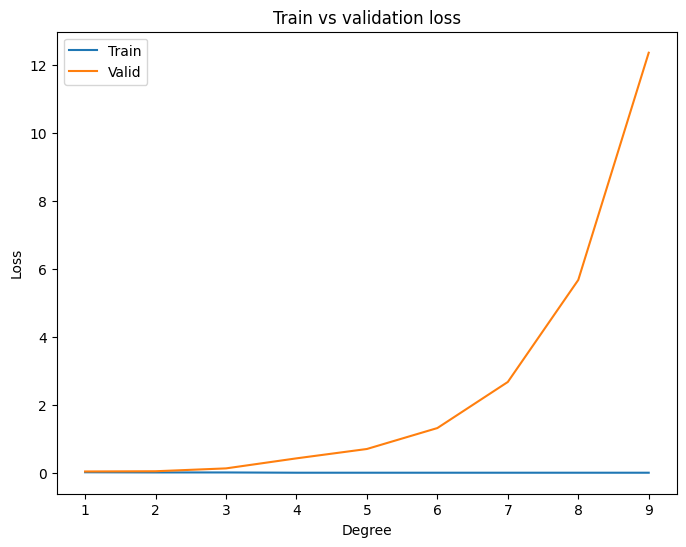

In [164]:
plt.figure(figsize=(8, 6))
plt.plot(range(1,10), tr_errors, label = 'Train')
plt.plot(range(1,10), val_errors,label = 'Valid')
plt.legend(loc = 'upper left')
plt.xlabel('Degree')
plt.ylabel('Loss')
plt.title('Train vs validation loss')
plt.show()

In [165]:
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
regr.fit(X_train_poly, y_train)
X_test_poly = poly.fit_transform(X_test)
y_pred_test = regr.predict(X_test_poly)
test_error = mean_squared_error(y_test, y_pred_test)
print(test_error)

0.01112732558153134


[[0.2173913 ]
 [0.02173913]
 [0.        ]
 [0.02173913]
 [0.02173913]
 [0.2173913 ]
 [0.02173913]
 [0.65217391]
 [0.06521739]
 [1.        ]
 [0.        ]
 [0.15217391]
 [0.19565217]
 [0.        ]
 [0.10869565]
 [0.        ]
 [0.23913043]
 [0.54347826]
 [0.06521739]
 [0.        ]
 [0.        ]
 [0.02173913]
 [0.02173913]
 [0.        ]
 [0.04347826]
 [0.08695652]
 [0.06521739]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.30434783]
 [0.        ]
 [0.17391304]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.06521739]
 [0.        ]
 [0.02173913]
 [0.02173913]]


<ipython-input-166-d6d67e60501a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['FailureCount']=scaler.fit_transform(y[['FailureCount']])


[0.01234690215328169, 0.005487882092660298, 0.0034169145542896793, 0.001441398865784499, 0.0014413988657844992, 0.0014413988657844992, 0.0014413988657844992, 0.0014413988657844992, 0.001441398865784499]
[0.055134086137350526, 0.09055803106137049, 0.22989295324573, 0.11757674793121445, 0.21509167726241796, 0.4121357151440477, 0.833207524018287, 1.7576684039700767, 3.80961044886422]


<Figure size 800x2000 with 0 Axes>

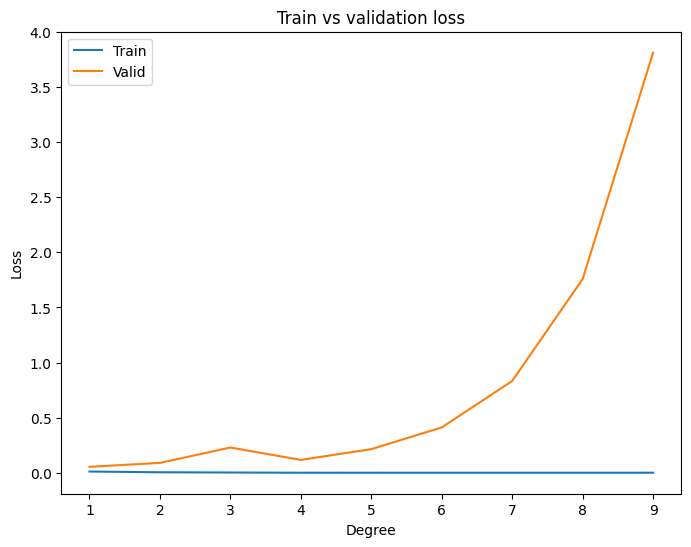

In [166]:
y=TestData[['FailureCount']]
y['FailureCount']=scaler.fit_transform(y[['FailureCount']])
y=y.to_numpy()

print(y)

X_train, X_rem, y_train, y_rem = train_test_split(X,y,test_size=0.5,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem,test_size=0.2,random_state=42)

tr_errors = []
val_errors = []
#Polynomial Regression
plt.figure(figsize=(8, 20))
for degree in range(1,10):
  poly = PolynomialFeatures(degree=degree)
  X_train_poly = poly.fit_transform(X_train)
  regr=LinearRegression(fit_intercept=False)
  regr.fit(X_train_poly,y_train)
  y_pred_train = regr.predict(X_train_poly)
  tr_error = mean_squared_error(y_train, y_pred_train)
  X_val_poly = poly.fit_transform(X_val)
  y_pred_val = regr.predict(X_val_poly)
  val_error = mean_squared_error(y_val, y_pred_val)
  tr_errors.append(tr_error)
  val_errors.append(val_error)

print(tr_errors)
print(val_errors)

plt.figure(figsize=(8, 6))
plt.plot(range(1,10), tr_errors, label = 'Train')
plt.plot(range(1,10), val_errors,label = 'Valid')
plt.legend(loc = 'upper left')
plt.xlabel('Degree')
plt.ylabel('Loss')
plt.title('Train vs validation loss')
plt.show()

In [167]:
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
regr.fit(X_train_poly, y_train)
X_test_poly = poly.fit_transform(X_test)
y_pred_test = regr.predict(X_test_poly)
test_error = mean_squared_error(y_test, y_pred_test)
print(test_error)

0.020640975309290804


# Correlation Analysis

In [168]:
#Corr Analysis
import seaborn as sns

    AIBestStep  Player1SuccessStep  Player2SuccessStep
0           36                  29                  57
1           33                  29                  30
2           29                  26                  36
3           18                  21                  23
4           32                  30                  23
5           32                  38                  43
6           27                  33                  51
7           41                  46                  43
8           19                  17                  37
9           27                  39                  30
10          18                  15                  62
11          41                  33                  27
12          15                  17                  33
13          26                  24                  30
14          41                  32                  17
15          33                  29                  47
16          22                  22                  37
17        

<Axes: >

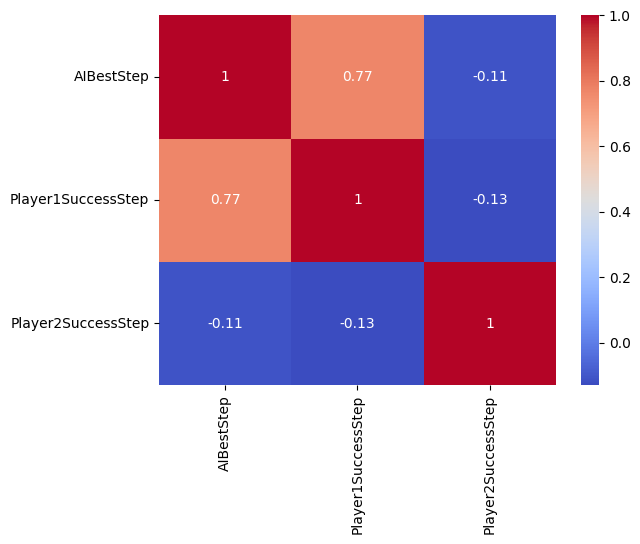

In [169]:
TestData=pd.concat([data1.rename(columns={'SuccessStep': 'Player1SuccessStep'})[['AIBestStep','Player1SuccessStep']],
                    data2.rename(columns={'SuccessStep': 'Player2SuccessStep'})[['Player2SuccessStep']]],
                   axis=1)

print(TestData)

for i in range(0,TestData.shape[1]):
  TestData.iloc[:, i]=scaler.fit_transform(TestData.iloc[:, [i]])

print(TestData)

corr_matrix = TestData.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

    AIBestStep  Player1PercivedDifficulty  Player2PercivedDifficulty
0           36                          7                          4
1           33                          3                          4
2           29                          1                          3
3           18                          2                          3
4           32                          3                          4
5           32                          6                          5
6           27                          2                          6
7           41                          7                          2
8           19                          1                          2
9           27                          7                          2
10          18                          2                          6
11          41                          4                          3
12          15                          3                          5
13          26                    

<Axes: >

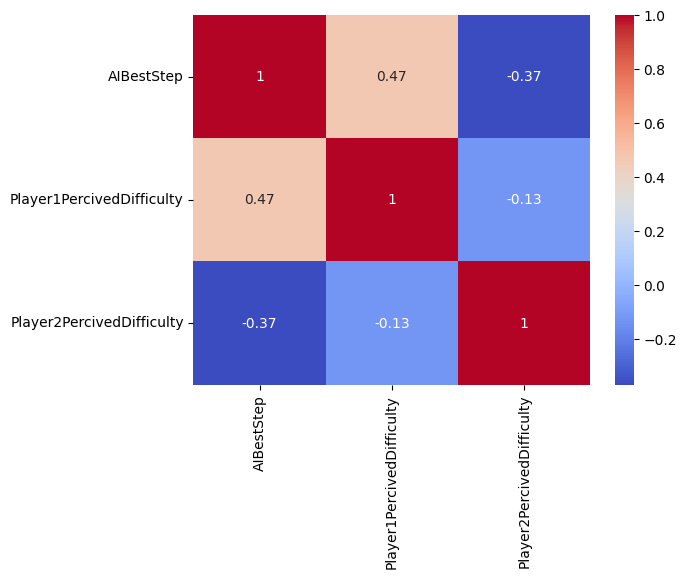

In [172]:
TestData=pd.concat([data1.rename(columns={'PercivedDifficulty': 'Player1PercivedDifficulty'})[['AIBestStep','Player1PercivedDifficulty']],
                    data2.rename(columns={'PercivedDifficulty': 'Player2PercivedDifficulty'})[['Player2PercivedDifficulty']]],
                   axis=1)

print(TestData)

for i in range(0,TestData.shape[1]):
  TestData.iloc[:, i]=scaler.fit_transform(TestData.iloc[:, [i]])

print(TestData)

corr_matrix = TestData.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)